<a href="https://colab.research.google.com/github/sokhan1/PYTHON/blob/main/Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
#(1) data
X = [1,2,3]
Y = [1,2,3]

#(2) hypothesis
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

def hypothesis(x):
    return W*x+b

#(3) cost function
def cost_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#(4)
optimizer = tf.optimizers.SGD(learning_rate=0.01)


In [6]:
#(5)
def train():
    # tf.GradientTape를 사용하여 모델을 훈련, 자동 미분을 윈한 tf.GradientTape
    with tf.GradientTape() as g:
        pred = hypothesis(X)
        cost = cost_function(pred, Y)

    #calculation of gradient
    gradients = g.gradient(cost, [W,b])
    #print(gradients)

    #gradients에 따라 W와 b업데이트
    optimizer.apply_gradients(zip(gradients,[W,b]))


In [7]:
for step in range(2001):
    train()

    #display
    if step % 500 == 0:
        pred = hypothesis(X)
        cost = cost_function(pred, Y)
        print("step = {}, cost = {}, W={}, b={}".format(step+1, cost, W.numpy(), b.numpy()))

step = 1, cost = 3.1297073364257812, W=[-0.32502863], b=[1.2503285]
step = 501, cost = 0.030494235455989838, W=[0.7971828], b=[0.4610512]
step = 1001, cost = 0.0027475617825984955, W=[0.93912053], b=[0.13839304]
step = 1501, cost = 0.0002475579094607383, W=[0.98172605], b=[0.04154107]
step = 2001, cost = 2.2304448066279292e-05, W=[0.99451476], b=[0.01246921]


In [9]:
print(X)
print(W)
print(b)

[1, 2, 3]
<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([0.99451476], dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.01246921], dtype=float32)>


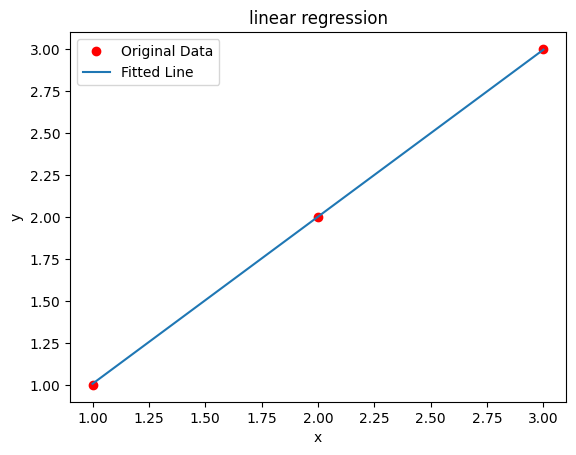

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#(6) visualization
plt.plot(X, Y, 'ro', label='Original Data')
plt.plot(X, np.array(W*X+b), label='Fitted Line')
plt.legend()
plt.title('linear regression')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [12]:
#(7) prediction
x_test = [10]
x_test_predict = np.array(x_test*W +b)
print("If 10 appears, then correct!!!\n", x_test_predict)

If 10 appears, then correct!!!
 [9.957617]
